# US 2020 ELECTION SOCIAL MEDIA INFORMATICS 

## INTRODUCTION 

**Background and Significance**

This project will supplement and contribute to the current available literature and methods used to predict and assess election results from social media sentiment. Moreover, Natural Language Processing (NLP) and Supervised Machine Learning (ML) algorithms will be used to provide additional implementation that will be used to further assess social media textual data to extract features and build sentiment indexes. Therefore, NLP techniques involving text classification that incorporate data retrieval, feature extraction and sentiment indexing will be implemented on unstructured social media data to convert this data to structured numerical data that can be used for election prediction and analysis. Furthermore, the successful implementation and prediction of election results from social media influence would result in the formulation and implementation of policy that would prevent the use of personal social media data to be used to influence election outcomes in non-democratic ways.

**Motivation**

The motivation behind this research project is to help provide conclusive evidence of the impact social media has at influencing the results of elections. Therefore, any evidence generated from this research project can help contribute to the growing literature on different methodologies and approaches of using sentiment analysis, and the causal implications of social media on elections. Thus, relevant authorities and governments would be able to formulate regulations and policies that would prevent and prohibit certain practices on social media that would influence election results in a non-democratic manner.  For example, the Cambridge Analytica scandal during the US presidential elections.

**Research Question**

Therefore, because social media can be used to encourage non-democratic election practices, it is important to understand how various channels of social media affect election results in order to develop and recommend policies that will deter undemocratic practices. Thus, this leads to the research question which states: ***“ How does social media influence and impact election results, and how can data analysis be used to quantify and evaluate this impact?”*** To achieve this, this project will analyze the relationship between sentiment and the outcome of Donald Trump's election results






# PROJECT ONE 


**PART ONE**

This section of the porject will determine whether Twitter can be used as an effective and viable method for political campaigning. This objective will be achieved in two steps. First, tweet data will be cleaned and disciptive statistics and simple visualizations made to understand the distribution of tweets for a particular presidential candidate across the United States. Then,five (5) states with the highest number of tweets will be used to conduct discriptive statistics to identify any correlations between the number of tweets for a particular candidate, and the outcome of the results in the given states.  

The dependent variable (Y) is the election result in a state, and the independent variables (X1,X2) are the number of tweets a candidate received and the sentiment of the tweet posted. The sentiment will be a proxy that will either be positive (1) or negative (0).

Finally, the data utilized for the project is an open source dataset from Kaggle (https://www.kaggle.com/manchunhui/us-election-2020-tweets/notebooks). The dataset contains a plethora of domestic (US) and international tweets with #Biden and #Trump tags collected during the 2020 US election period.



**Importing the necessary packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
!pip install descartes

In [ ]:
import pandas as pd 
import folium
from folium.plugins import TimeSliderChoropleth
import json
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas as gpd 
from shapely.geometry import Point, Polygon
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import time
from datetime import datetime
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

**Importing dataset** 

In [ ]:
df_trump = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hashtag_donaldtrump.csv',lineterminator='\n')
df_biden = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hashtag_joebiden.csv',lineterminator='\n')

**Data Manipulation & Visualization**

Cleaning the Trump dataset 

In [ ]:
df_trump.head(30) # viewing the first 30 entries in dataframe
df_trump.isnull().sum() # summing the number of missing entries in each column
df_trump.loc[:,'candidate'] = 'Trump' # Adding a column with an identifier of the mentioned candidate to denote hashtag in tweet
df_trump1 = df_trump.dropna() # dropping rows with null values 

Cleaning the Biden Dataset

In [ ]:
df_biden.head(30) # viewing the first 30 entries in dataframe
df_biden.isnull().sum() # summing the number of missing entries in each column
df_biden.loc[:,'candidate'] = 'Biden' # Adding a column with an identifier of the mentioned candidate to denote hashtag in tweet
df_biden1 = df_biden.dropna() # dropping rows with null values 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



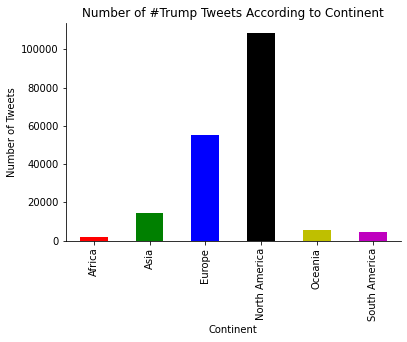

In [ ]:
%matplotlib inline
my_colors = ['red','green','blue','yellow','black','pink'] 
df_trump1.groupby('continent').tweet.agg(['count']).plot(kind = 'bar',title = 'Number of #Trump Tweets According to Continent', color = 'rgbkymc')
plt.xlabel('Continent')
plt.ylabel('Number of Tweets')

# set colors 
ax = plt.gca()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()

plt.show()

The graph above shows the number of #Trump tweets on each continent. North America has the most recorded tweets with a count greater than 100,000, with the least recorded in Africa. In this case the sample size of the number of tweets can be used as an explanatory variable to determine the number of retweets in the US to supplement the impact of social media sentiment in the US.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



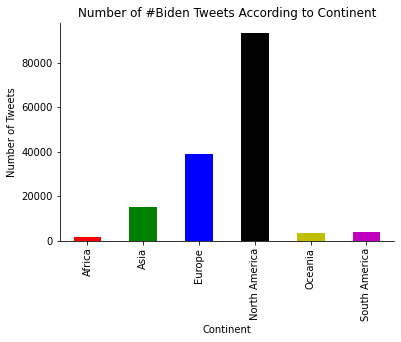

In [ ]:
# making a barplot of the #Biden tweets on different continents
%matplotlib inline
my_colors = ['red','green','blue','yellow','black','pink'] 
df_biden1.groupby('continent').tweet.agg(['count']).plot(kind = 'bar',title = 'Number of #Biden Tweets According to Continent', color = 'rgbkymc')
plt.xlabel('Continent')
plt.ylabel('Number of Tweets')

# set colors 
ax = plt.gca()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()

plt.show()

The graph above shows the total number of #Biden tweets on each continent. From the graph, North America has the largest recorded #Biden tweets, with a count of over 80,000.In this case the sample size of the number of tweets can be used as an explanatory variable to determine the number of retweets in the US

In [ ]:
trump = df_trump1.drop(columns=["tweet_id","user_id","user_name","user_screen_name","user_description"]) # dropping unecessary columns 
biden = df_biden1.drop(columns=["tweet_id","user_id","user_name","user_screen_name","user_description"]) # dropping unecessary columns 

trump1 = trump.query("country == 'United States of America'") # querying the data to only include tweets from the US
biden1 = biden.query("country == 'United States of America'") # querying the data to only include tweets from the US

In [ ]:
trump_data1 = trump1.groupby(['state']).count().tweet #group by states
test1 = pd.DataFrame(trump_data1) # creating a datframe for states 

biden_data1 = biden1.groupby(['state']).count().tweet #group by states
test2 = pd.DataFrame(biden_data1) # creating a datframe for states

state_data = pd.merge(test1, test2, on = 'state') # merging the datasets using the state
state_data = state_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y': 'Biden Tweets'})

Text(0, 0.5, 'Number of Tweets')

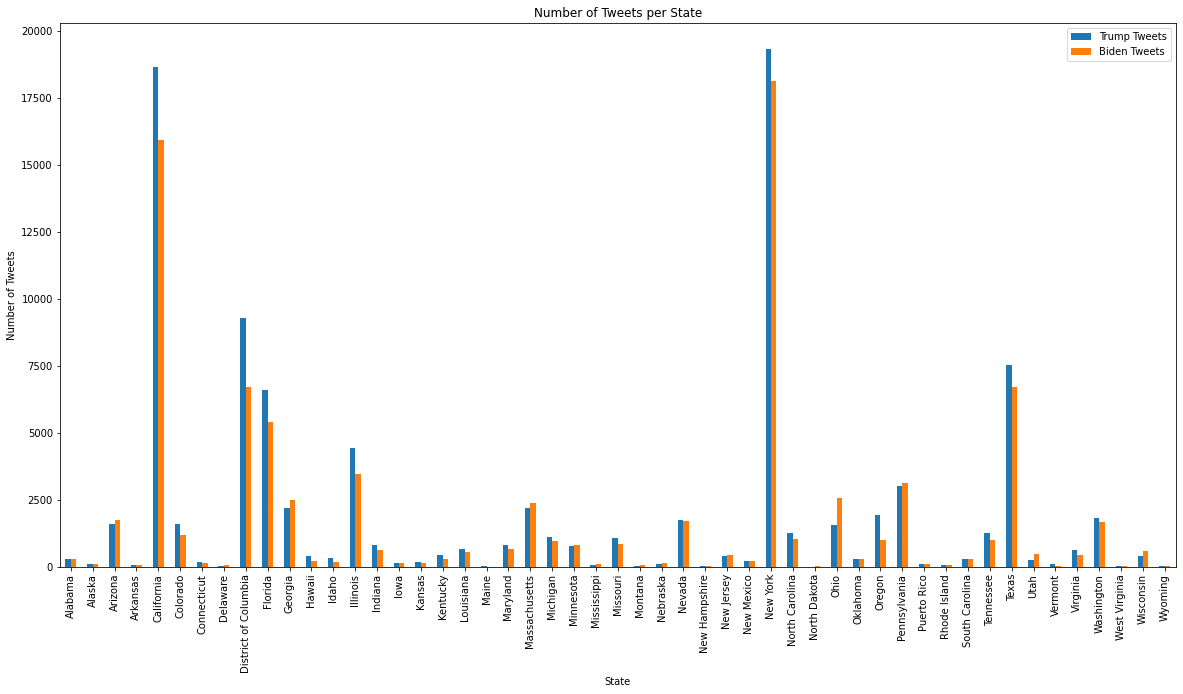

In [ ]:
state_data.plot(kind='bar',title='Number of Tweets per State', figsize=(20,10), width = 0.5)
plt.xlabel('State')
plt.ylabel('Number of Tweets')

The graph above shows the distribution of tweets for Trump and Biden in each of the 50 states. On average, Donald Trump received more tweets than Joe Biden. Further, the five (5) states with the higest number of recorded tweets in descending order are: New York, California, District of Columbia, Texas, and Florida. It is important to note that many of the states that recorded over 2500 tweets are all coastal states. 

# PROJECT TWO 

**PART TWO**

**Visualization**

The objective of this section is to create insightful visuals of the data pertaining to the US 2020 elections. The visuals will include among others correlation plots and distribution maps that will help provide further insights on the election tweets and polling results in each of the 50 states. 

**Merging U.S election data with Twitter Data**

NB: A new dataset containing the US 2020 Presidential results is imported, cleaned, merged and visualized.

In [ ]:
pres_state = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/president_county.csv') #importing state level presidential results 
can_county = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/president_county_candidate.csv') #importing county level presidential candidate
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip") #importing US state geometry 
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip") #importing US county geometry 
county_list = can_county.drop(columns=['candidate','party','total_votes', 'won'], axis=1)
county_list.head()

trump_data = can_county.query("candidate == 'Donald Trump'") # query data by Trump 
biden_data = can_county.query("candidate == 'Joe Biden'") # query data by Biden

trump_total = trump_data['total_votes'].sum() # total votes for trump
biden_total = biden_data['total_votes'].sum() # total votes for biden 
total_votes = can_county['total_votes'].sum() # total votes in US election


trump_share = trump_total/total_votes # vote share of trump 
biden_share = biden_total/total_votes # vote share of biden 

votes = [trump_share, biden_share]
name = ['Donald Trump', 'Joe Biden']

dem = can_county[can_county["party"] == "DEM"] # boolean expression to query results for Democrats
rep = can_county[can_county["party"] == "REP"] # boolean expression to query results for Republicans

dem_state_vote = dem.groupby('state').sum() # grouping democrat votes by state 
rep_state_vote = rep.groupby('state').sum() # grouping republican votes by state 

dem_state_vote['Republican votes'] = rep_state_vote['total_votes']
dem_state_vote.rename(columns={'total_votes':'Democrat votes'}, inplace=True) #renaming column 

In [ ]:
winner = [] # empty list 

for i, row in dem_state_vote.iterrows(): # looping over created dataset to determine winner 
  if row['Democrat votes'] > row['Republican votes']:
    winner.append('Democrat')
  else:
    winner.append('Republican')

winner = np.array(winner)
winner 

dem_state_vote['Winner'] = winner # creating new winner variable 
dem_state_vote.sort_values('Democrat votes', ascending=False, inplace=True) # sorting votes in descending order
dem_state_vote.reset_index(inplace=True)

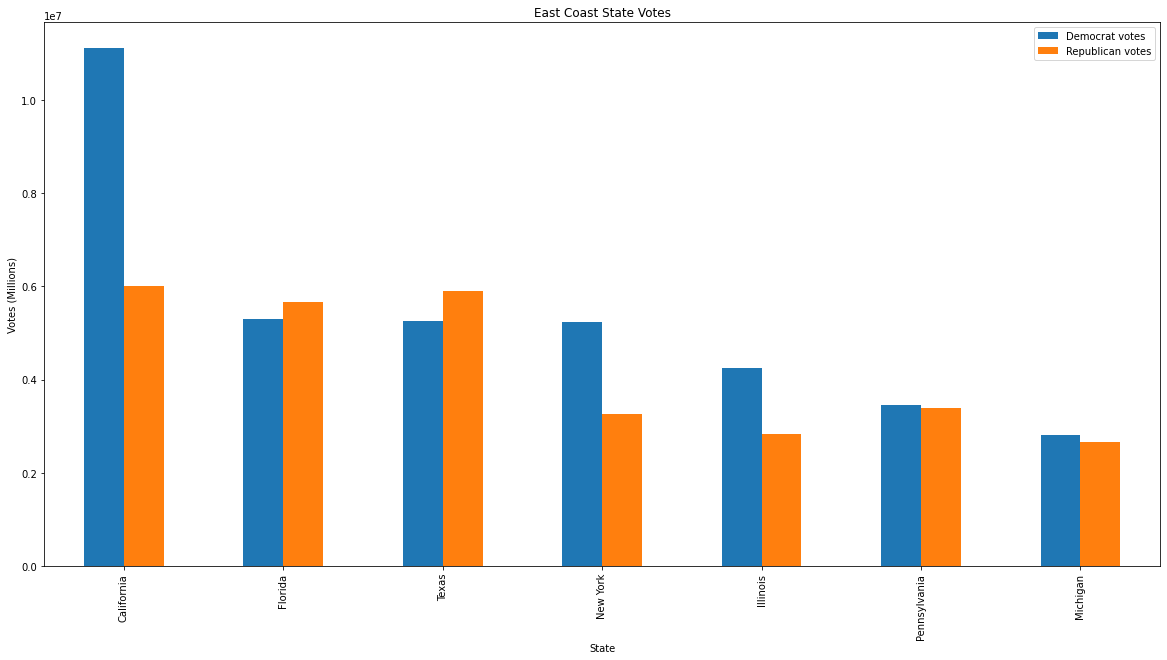

In [ ]:
demcols = [0,1] # creating a list 
repcols = [0,3] # creating a list 
dem = dem_state_vote[dem_state_vote.columns[demcols]] # extracting democrat information
dem1 = dem.iloc[0:7] # taking first 7 states

rep = dem_state_vote[dem_state_vote.columns[repcols]] # extracting republican information
rep1 = rep.iloc[0:7] # taking first 7 states

totalstat1 = dem1.merge(rep1, left_on='state', right_on='state') # merging data

#Plotting information
totalstat1.plot(kind='bar', x= 'state', title='East Coast State Votes', figsize=(20,10), width = 0.5)
plt.xlabel('State')
plt.ylabel('Votes (Millions)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The Graph above shows the number of major coastal states each party won. The Democratic party had an overwhelming victory in the state of California, but narrowly won or lost in the other major US states.

NB: Y variable are the election polling results in the US.

array([[1.        , 0.14655378],
       [0.14655378, 1.        ]])

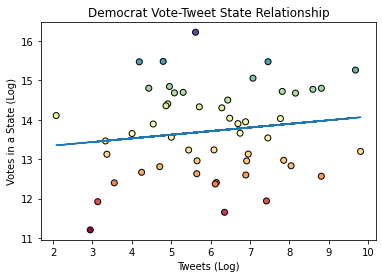

In [ ]:
totalstat = dem.merge(rep, left_on='state', right_on='state') # Major east coast election results 
totalstat['Log Dem'] = np.log(totalstat['Democrat votes']) # log of votes 
totalstat['Log Rep'] = np.log(totalstat['Republican votes']) # log of votes 
state_data.head() # US tweet information 
tweets = state_data.iloc[0:51]
tweets = np.log(tweets) # taking the log of tweets


from matplotlib import rcParams
 
plt.scatter(tweets['Biden Tweets'], totalstat['Log Dem'], c= totalstat['Log Dem'], cmap= 'Spectral', edgecolors='k')
plt.title("Democrat Vote-Tweet State Relationship")
plt.xlabel('Tweets (Log)')
plt.ylabel("Votes in a State (Log)")
m, b = np.polyfit(tweets['Biden Tweets'], totalstat['Log Dem'], 1)
plt.plot(tweets['Biden Tweets'], m*(tweets['Biden Tweets']) + b)

r = np.corrcoef(tweets['Biden Tweets'],totalstat['Log Dem']) # computing the correlation
r

The scatter plot above shows a very weak and positive correlation (0.14) between the number of Democrat tweets in a state, and the number of Democrat votes received in the given state. However, no casual claims can be assumed due to the possibility of numerous confounding variables. In addition, a log transformation was applied to the number of tweets, and votes to linearize the data.

NB: The different colors can be interpreted as states within the same cluster having similar numbers of votes.

array([[1.        , 0.22792343],
       [0.22792343, 1.        ]])

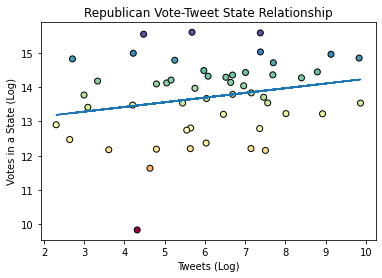

In [ ]:
from matplotlib import rcParams
 
plt.scatter(tweets['Trump Tweets'], totalstat['Log Rep'], c= totalstat['Log Rep'], cmap= 'Spectral', edgecolors='k')
plt.title("Republican Vote-Tweet State Relationship")
plt.xlabel('Tweets (Log)')
plt.ylabel("Votes in a State (Log)")
m, b = np.polyfit(tweets['Trump Tweets'], totalstat['Log Rep'], 1)
plt.plot(tweets['Trump Tweets'], m*(tweets['Trump Tweets']) + b)

r = np.corrcoef(tweets['Trump Tweets'],totalstat['Log Rep']) # computing the correlation
r

The scatterplot above shows a weak and positive correlation (0.22) between the number of Republican tweets in a state, and the number of Republican votes received in the given state. It is important to note that the correlation republican correlation is much stronger than the democrats. In addition, no causal claims can be made about the influnce of tweets on voting in a state. Finally, log transformations were applied to the number of tweets, and votes to linearize the data. 

NB: The different colors can be interpreted as states within the same cluster having similar numbers of votes.

**GEOGRAPHIC INFORMATION**

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1976-2020-president.csv')
update_results = results.query("year == '2020'") # querying the data to include election results for 2020 presidential elections 
update = update_results[(update_results.party_simplified == 'DEMOCRAT') | (update_results.party_simplified == 'REPUBLICAN')] # filetring the data to include only Democrat and Republican candidates

data = dict(type = 'choropleth', 
            colorscale = 'Greens',
            z = update['totalvotes'],
            locations = update['state_po'],
            locationmode = 'USA-states',
            text = update['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width =1)),
            colorbar = {'title' : 'US 2020 Election Vote Distribution'})

layout = dict(title = 'US 2020 ELECTION: TOTAL VOTE DISTRIBUTION',
            geo = dict(scope = 'usa',
                  showlakes = False,
                  lakecolor = 'rgb(85,173,240)')
)
choromap = go.Figure(data =[data], layout = layout)
choromap.show()

The map above shows the distribution of US election results. The West and East coast states have votes greater or equal to 8 million. With inland states having fewer than 8 million votes. This is primarily due to the fact that Coastal states are more populated than inland states. This information will be useful because it will help narrow the states based on population and votes cast to include for further analysis. 

In [ ]:
states = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/US_State_Data/cb_2018_us_state_5m.shp') # USA shape file 
states.set_index('NAME',inplace=True) # changing shape file index 

trump1['coordinates'] = list(zip(trump1.long,trump1.lat)) # creating a column variable with location info
biden1['coordinates'] = list(zip(biden1.long,biden1.lat)) # creating a column variable with location info

trump1["coordinates"] = trump1["coordinates"].apply(Point)
biden1["coordinates"] = biden1["coordinates"].apply(Point)

gtrump = gpd.GeoDataFrame(trump1, crs = 4326, geometry = 'coordinates')
gbiden = gpd.GeoDataFrame(biden1, crs = 4326, geometry = 'coordinates')

gbiden.drop(columns=['created_at','likes','retweet_count','source','user_join_date','user_followers_count','user_location','lat','long','collected_at'], inplace=True) # Dropping columns
gtrump.drop(columns=['created_at','likes','retweet_count','source','user_join_date','user_followers_count','user_location','lat','long','collected_at'], inplace=True)
gtrump.set_index('state')

states['Trump Tweets'] = gtrump.groupby(['state']).count().tweet # adding the total number of tweets in each state for Trump
states['Biden Tweets'] = gbiden.groupby(['state']).count().tweet # adding the tota number of tweets in each state for Biden

states.reset_index(inplace=True)

states['Dem Percent'] = (states['Biden Tweets'] / (states['Biden Tweets'] + states['Trump Tweets'])) * 100 # making a percentage for the tweets in each state 
states['Rep Percent'] = (states['Trump Tweets'] / (states['Biden Tweets'] + states['Trump Tweets'])) * 100 # making a percentage for the tweets in each state 

In [ ]:
fig = px.choropleth(states,
                    color = 'Dem Percent',
                    locations = 'STUSPS',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    hover_name = 'NAME',
                    hover_data = ['Dem Percent','Rep Percent'],
                    range_color = [25,75],
                    color_continuous_scale = 'balance',
                    title = 'US 2020 ELECTION: PERCENTAGE OF TWEETS FOR DEMOCRAT PARTY'
)
fig.show()

The map shows the distribution of US 2020 election tweets across all 50 states. From the map, it is evident that in many of the states, the prevelant tweets were those whose subject was #DonaldTrump (Blue). In addition, many of the states in which Donald Trump had overwhelming tweets are all inland states. 

In [ ]:
election_results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/democratic_vs_republican_votes_by_usa_state_2020.csv')
election_results['Republican'] = 100 - election_results['percent_democrat']
election_results.rename(columns={'percent_democrat':'Democrat'}, inplace=True)
election_results.head()

fig = px.choropleth(election_results,
                    color = 'Democrat',
                    locations = 'usa_state_code',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    hover_name = 'state',
                    hover_data = ['Democrat','Republican'],
                    range_color = [25,75],
                    color_continuous_scale = 'balance',
                    title = 'US 2020 ELECTION: PERCENTAGE OF VOTES FOR DEMOCRAT PARTY'
)
fig.show()

The map shows the distribution of the US 2020 election according to party. It is important to note that the despite having won in more states, the population of inland states is not comparable to coastal states. Further, the Democratic party had overwhelming victories in coastal states and lost in many of the inland states. 

# PROJECT 3 

**PART 3**


The goal of this section is to determine how effective social media, Twitter in particular can influence election polling results. To achieve this objective, two types of data are required. The required data consists of structured and unstructured data. The strutured data includes data like state and county election polling results which is primarily numerical in nature. Further, the unstrcutured data consists of textual data from social media platforms with topics pertaining to US elections. This data is vital because it provides insight about the quality of information spread and the sentiment of the information to either endorse or dissapprove candidates. Thus, unstructured textual data from **Twitter** (twitter.com) is important because it will provide useful information about tweets made within the United States, and the sentiment of those tweets that are indicative of political affiliation. The tweets can then be further analyzied by observing the number of likes and retweets to determine the popularity of the sentiment of the tweets topic within the given county and state. 

The collection of textual data from Twitter will be a gradual process and involve the use of webscrapping. The data textual data will be scapped and collated according to clearly idenfiable #hashtags (#Trump/#Biden). Once collected, the data will need to be categorized according to subject to create a dataframe, i.e Trump or Biden. The subjects will then be labelled as either Democrat or Republican. The dataframe will then be merged with existing US 2020 election data. 



**WEB SCRAPPING US POPULATION INFORMATION**

In [ ]:
import requests # importing neccessary packages to make requests to servers 
from bs4 import BeautifulSoup # importing HTML parsers 

Request & Response 

In [ ]:
URL = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population' # assigning the wiki link for easier retrieval 
r = requests.get(URL) # requesting information from the url via requests package
soup = BeautifulSoup(r.text) # creating a soup object

Find All Tables 
Extracting the HTML containing all tables on the Wiki page

In [ ]:
table = soup.find('table') # extracting the table from the html 
all_values = table.find_all('tr') # extracting the rows of information from the table
# all_values[2].find_all('td') # finding the column in the table 

Creating a DataFrame and adding the scrapped data into the created Dataframe.

In [ ]:
US = pd.DataFrame(columns = ['State','Population', '2010-2019_Change','Estimated_Pop_Vote','Percent_US_Pop']) # Create an empty dataframe
ix = 0 # Initialise index to zero
for row in all_values[1:]:
 values = row.find_all('td') # Extract all elements with tag <td>
 # Pick only the text part from the <td> tag
 State = values[2].text.strip()
 Population = values[3].text.strip()
 Change = values[5].text.strip()
 Est_Pop_vote = values[8].text.strip()
 Percent_US = values[11].text.strip()
 
 US.loc[ix] = [State, Population, Change, Est_Pop_vote, Percent_US] # Store it in the dataframe as a row
 ix += 1
 
# Print the first 5 rows of the dataframe
# US.head()

# MERGING SCRAPPED DATA WITH US ELECTION DATA 

In [ ]:
Data = US.merge(election_results,left_on='State',right_on='state', how='inner') # merging scrapped population wiki info with U.S Election data 
Data.drop(columns=['state','usa_state'], axis=1,inplace=True)
Data["Population"] = Data["Population"].str.replace(",","").astype(float) # converting string to float
# Data.head()

In [ ]:
fig = px.choropleth(Data,
                    color = 'Population',
                    locations = 'usa_state_code',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    hover_name = 'State',
                    hover_data = ['Democrat','Republican','Population'],
                    range_color = [100000,40000000],
                    color_continuous_scale = 'balance',
                    title = 'US 2020 POPULATION'
)
fig.show()

The map above shows the distribution of the U.S population in 2020. From the map, we can see that the majority of the U.S is population is concentrated along the coastal regions of the country. With inland states on average having populations of upto 10 million. This information is important because it explains the reason Donald Trump lost the presidential elections despite winning in many inland states compared to coastal states. In addition, the majority of Donald Trumps tweets were tweeted in inland states, compared to Joe Biden whose majority were in Coastal states. This is important to keep note of when analysis the sentiment of the tweets and how sentiment can be used to influence the masses. 

## FINAL PROJECT 

In this section, linear regression models will be created to establish whether social media can be used as a viable tool to predict election outcomes. In addition, sentiment analysis will be conducted on tweets collected pertaining to the US 2020 elections, and the sentiment of the tweets will be included in the regressions. Furthermore, a supervised machine learning algorithm will also be utilized in addition to the linear regression model to predict the election outcome. 



The regressors included in the regression model are:

1.   ***Number of Tweets***
2.   ***Sentiment***
3.   ***Retweet*** 
4.   ***Access to Twitter***  
5.   ***Likes of Tweet***

These regressors are included in the model because they provide the most information about how social media is often used in a daily setting by the average person. Furthermore, these regressors also provide addition criteria that can be used to assess and quantify the influence of social media posts. For example, the number of ***Likes*** and ***Retweets*** will be used as metrics to assess the reach of posts both between and within different social groups. In addition, the ***Sentiment*** will be used as an indicator of support for a running candidate. Consequently, the regressors will be able to adequately explain the outcome of elections because they capture vital aspects such as sentiment and popularity which can be used to determine the popularity of a candidate. 







Additionally, a non linear relationship exists between the number of tweets and the election results as evidenced from simple scatter plots visualized in ***Part Two*** of this project. A reason for this is because the rate of increase or decrease can change as one variable changes which can cause curved patterns in the data. Further, because sentiment is a categorical variable, and a scatter plot to determine linearity cannot be visualized, I will provide a simple arguement to establish a linear relationship between sentiment and election results. I belive a linear relationship exists between the variables because the relationship between the two variables is monotonic. This is because both variables increase or decrease concurrently. That is when the sentiment is high and positive for a particular candidate, their polling results are also high. The same is true when a candidate has a high and negative sentiment, they have lower polling results. Because of this we can conclude that the relationship is monotonic and linear. The scatter below shows the monotonic relationship between vote share and number of tweets. 

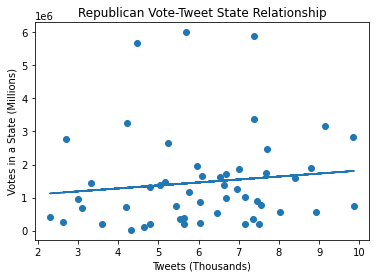

In [ ]:
plt.scatter(tweets['Trump Tweets'], totalstat['Republican votes'])
plt.title("Republican Vote-Tweet State Relationship")
plt.xlabel('Tweets (Thousands)')
plt.ylabel("Votes in a State (Millions)")
m, b = np.polyfit(tweets['Trump Tweets'], totalstat['Republican votes'], 1)
plt.plot(tweets['Trump Tweets'], m*(tweets['Trump Tweets']) + b)

**SENTIMENT ANALYSIS**

In [ ]:
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag 
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [ ]:
trump_1 = trump1[['tweet','likes','retweet_count','user_followers_count','state','candidate']] # including necessary columns for data 
trump_1.reset_index(inplace=True) # resetting the index of the newly created dataframe
trump_1.drop(columns=['index'],inplace=True)

Creating a function to clean the text of each tweet which will include the standardization of the text to remove punctuations, special characters and tokenize the text.

In [ ]:
# set stop words
stop = set(stopwords.words('english')) # stop words from NLTK
stop = stop.union(["said","im"])

# set punctuations
exclude = set(string.punctuation)
exclude.update(['’','“','”'])

# initialize lemmatizer 
lemma = WordNetLemmatizer()

def clean(doc):
    numb_free = ''.join([i for i in doc if not i.isdigit()]) # exclude digits
    punc_free = ''.join(ch for ch in numb_free if ch not in exclude) # exclude puntuations
    stop_free = " ".join([i for i in punc_free.lower().split() if i not in stop]) # exclude stopwords
    normalized = [lemma.lemmatize(word) for word in stop_free.split()] # bring word to its root
    normalized2 = " ".join([word for word in normalized if len(word) != 1])
    return normalized2

In [ ]:
# clean text with lemmatization
trump_1['tweet'] = [clean(text) for text in trump_1.tweet] # preprocessing each article

In [ ]:
sco_neg = [] # empty list for negative sentiment 
sco_pos = [] # empty list for positive sentiment 

sent = SentimentIntensityAnalyzer() # create sentimentanalyzer object

for i in range(0,trump_1.shape[0]): # looping through the dataframe to create an index for each tweet.
  score = sent.polarity_scores(trump_1.iloc[i][0]) # go through all rows
  score2 = score['pos']
  sco_pos.append(score2)
  score3 = score['neg']
  sco_neg.append(score3)

In [ ]:
trump_1['Positive'] = sco_pos # creating a column with positive sentiment
trump_1['Negative'] = sco_neg # creating a column with negative sentiment 
trump_1.reset_index(drop=True,inplace=True)
# trump_1.head()

Creating a dummy for the sentiment of each tweet that can be used as a regressor.

In [ ]:
sentiment = [] # empty list 

for i, row in trump_1.iterrows(): # looping over created dataset to determine sentiment 
  if row['Positive'] > row['Negative']:
    sentiment.append(1)
  else:
    sentiment.append(0)

sentiment = np.array(sentiment)
sentiment 

trump1['Sentiment'] = sentiment

**OLS REGRESSION**

In [ ]:
# ! pip install linearmodels 
# ! pip install statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from sklearn import metrics
from sklearn import linear_model

In [ ]:
trump_1 = trump1[['likes','retweet_count','user_followers_count','state','Sentiment','source']]
trump_1.reset_index(inplace=True)
trump_1.drop(columns=['index'],inplace=True)
# trump_1.head() 

Creating a dummy for access to twitter. That is how did people access the content of the tweet. For example, did they hear about the tweet from word of mouth, or their own personal device. This is important, because many people in rural America have little access to such technologies because the population of rural America is old relative to urban America. 

In [ ]:
internet = []

for i, row in trump_1.iterrows(): # looping through the dataset to create dummy variables by identify access to twitter 
  if row['source'] == 'Twitter Web App' or row['source'] == 'Twitter for iPhone' or row['source'] == 'Twitter for Android':
    internet.append(1)
  else:
    internet.append(0)

internet = np.array(internet)

trump_1['internet'] = internet

Creating dummies for the popularity of a tweet in addition to its sentiment. This is done by counting the number of retweets and likes a post has which implies that the sentiment of that tweet is prevalent, and we would like to determine the effect of the prevalence of the given sentiment on the outcome of the election. 

In [ ]:
retweet = []

for i, row in trump_1.iterrows(): # looping through the dataset to create dummy variables
  if row['retweet_count'] >= 1000 :
    retweet.append(1)
  else:
    retweet.append(0)

retweet = np.array(retweet)

trump_1['retweet'] = retweet

In [ ]:
like = []

for i, row in trump_1.iterrows(): # looping through the dataset to create dummy variables
  if row['likes'] >= 1000 :
    like.append(1)
  else:
    like.append(0)

like = np.array(like)

trump_1['like'] = like

In [ ]:
text_trump = trump_1.sample(n=30000,random_state = 0, replace=False)
text_trump.sort_values(by=['state'],ascending=True,inplace=True)
text_trump.reset_index(drop=True,inplace=True)

text_trump = text_trump.merge(tweets,right_on='state',left_on='state')

text_trump.drop(columns=['retweet_count','likes'], inplace=True)

# text_trump.head()

In [ ]:
totalstat.sort_values(by=['state'],ascending=True,inplace=True)
totalstat.reset_index(drop=True,inplace=True)
reg_data = text_trump.merge(totalstat, right_on='state',left_on='state')
reg_data['user_followers_count'] = np.log(reg_data['user_followers_count'])
reg_data.drop(columns=['Biden Tweets','Democrat votes','Log Dem'], inplace=True)
reg_data.rename(columns={'Trump Tweets':'Trump_Tweets', 'Log Rep':'Log_Rep'},inplace=True)
# reg_data.head()

**FITTING OLS MODEL**

Four regression models were fitted on the data. The regressions were specifically chosen and run in ascending order according to the number of independent variables in order to determine the statistical significance and change in magnitude of each regressor. To achieve this, a simple linear model is computed, with the only independent variable being the log of the number of tweets. Additional independent variables were then added to the model, and the magnitude and changes in significance of each coefficient were compared. In addition, for each iterative process, the adjusted R-squared was noted to assess the value added of each regressor to the model. 

On the other hand, the intercept is only computed in the first bivariate model because the intercept does not provide any useful information pertaining to the study. Therefore, the intercept was omitted from subsequent models. Furthermore, other fixed effects like state fixed effects were omitted from the regressions because these effects would  soak up all the across-group differences which is a vital component to the study. For example, it is important to keep the differences of individuals in states that are primarily democrat or republican for this study. In addition, another significant limitation of fixed effects models is that it does not allow us to assess the effect of variables that have little within-group variation. However, not including these fixed effects would lead us to having potential omitted variable bias (OVB) of unobserved correlated variables. But for the purpose of this study, we will have to forgone the fixed effects. 

Finally, the model that will be chosen is the model that maximises the R-squared adjusted with the most variables (M4) and the performance of the regressions will be assessed by evaluating the F-score of each regression model and the change in the R-squared adjusted to determine the relevance of the model and the useful of each additional regressor to the model. The F-test is used as a measure because it indicates whether the linear regression model provides a better fit to the data than a model that contains no independent variables. In addition, the R-squared adjusted provides information about how well the model fits the data.

In [ ]:
m1 = sm.OLS.from_formula('Log_Rep ~ Trump_Tweets', data=reg_data).fit()
m2 = sm.OLS.from_formula('Log_Rep ~ Trump_Tweets + C(Sentiment)', data=reg_data).fit()
m3 = sm.OLS.from_formula('Log_Rep ~ Trump_Tweets + C(Sentiment) + C(retweet)', data=reg_data).fit()
m4 = sm.OLS.from_formula('Log_Rep ~ Trump_Tweets + C(Sentiment) + C(retweet) + C(internet)+ C(like)', data=reg_data).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_Rep   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     280.6
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          2.31e-294
Time:                        12:36:31   Log-Likelihood:                -56464.
No. Observations:               29970   AIC:                         1.129e+05
Df Residuals:                   29964   BIC:                         1.130e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.9202      0.06

In [ ]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[m1,m2,m3,m4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['Intercept',
                                             'Trump_Tweets',
                                             'Sentiment',
                                             'retweet',
                                             'internet',
                                             'like'])

results_table.add_title('Table - OLS Regressions')

print(results_table)

               Table - OLS Regressions
                  Model 1  Model 2  Model 3  Model 4 
-----------------------------------------------------
Intercept         12.24*** 12.20*** 12.20*** 11.92***
                  (0.06)   (0.06)   (0.06)   (0.07)  
Trump_Tweets      0.26***  0.26***  0.26***  0.26*** 
                  (0.01)   (0.01)   (0.01)   (0.01)  
C(Sentiment)[T.1]          0.09***  0.09***  0.08*** 
                           (0.02)   (0.02)   (0.02)  
C(internet)[T.1]                             0.31*** 
                                             (0.03)  
C(like)[T.1]                                 -0.83***
                                             (0.25)  
C(retweet)[T.1]                     -1.92*** -1.10** 
                                    (0.48)   (0.54)  
R-squared         0.04     0.04     0.04     0.04    
No. observations  29970    29970    29970    29970   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


After running the regressions, the results show that ***Tweets***, ***Sentiment***, and access to the ***internet*** (Mobile devices) are all significant and positively contribute to elections results. In addition, the ***Tweets*** and ***Sentiment*** are all significant at the 1% level, while ***Internet access*** is significant at the 5% level. Furthermore, the most influential regressor is ***Sentiment*** with a coefficient of 12. This coefficient can understood as an associated increase in votes (million) when the sentiment is positive. Further, these results also show that the impact of the number of tweets posted has a relatively low associated impact on the outcome of election results compared to other variables. Additionally, the results also show the different ways that social media has an impact on the outcome of election results and the subsequent quantifiable impact on election results, and that enormous associated impact of online sentiment on election results. 

However, it is important to note that these results are not indicative of casual effects. This is because of the prescence of observable and unobservable confounding variables that have not being controlled for and therefore violate the ***Conditional Independence Assumption***. Therefore, these results can only be interpreted from an associative lens.

Finally, several statistical characteristics were considered when evaluating the performance of the regressions in order to pick a preferred model. The statistical criteria picked were R-squared adjusted, F-statistic, and Akaike Information Criteria (AIC). The criteria were used in conjunction in order to picked the best model specification. With an R-squared adjusted of 5 percent, the model and variables explain a small variation in the data but this was expected because of the omission of other variables like financial resources, age, and state effects among others. In addition, relative to the R-squared, the AIC explains how the model will predict new data. The AIC penalizes the model for the addition of predictor variables, but only by marginal amounts. Therefore, the
smaller the AIC the better the model. Furthermore, the F-statistic provides
a measure that indicates whether the regression model provides a better fit to the data than a model that contains no independent variables. Model 4 had the Largest F-statistic and R-squared Adjusted and smallest AIC. Therefore it was the most preferred model.

**MACHINE LEARNING MODELLING**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

The parameters used to tune the decision tree include:


1.   Splitter = Best
2.   Max Depth = 4
3.   Max Features = 3

The splitter parameter enables the tree to split according to the best feature available, rather than the best random feature. By doing this, the best features are used that significantly reduce the MSE and Gini of each node. In addition, the depth of the tree was set to 4 in order to avoid the issue of overfitting the data. Further, the features was set to three so the algorithm could pick to split based on the best three features for each given node as compared to randomly selecting features. These parameters were selected in order to avoid the issue of overfitting and creating a model that can perform well on a new data set.

Additionally, the predictors chosen as feature variables include:

1.  Trump Tweets 
2.  Retweets 
3.  Internet 
4.  Sentiment 
5.  Like 

These features were chosen because they provide the most important information from social media use that can be used to predict the outcome of election results based on common social media uses. 



In [ ]:
df_features = reg_data[['Trump_Tweets','retweet','internet','Sentiment','like']] # creating a features list 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, reg_data.Log_Rep, test_size=0.25) # spliiting data into Test and Train datasets 

In [ ]:
elec = tree.DecisionTreeRegressor(splitter = 'best', max_depth=4, max_features=3, random_state=0) # tunning parameters 
dt = elec.fit(X_train, y_train) # fitting decision tree
y_pred = elec.predict(X_test) # predicting outcome variable 

In [ ]:
# print training and test accuracy rate
print("training:", dt.score(X_train,y_train))
print("test:", dt.score(X_test,y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

training: 0.8911882566635664
test: 0.8822610702331971
Mean Squared Error: 0.29740747873110907


The regression tree has a relative high test accuracy of 88%. This means that the model was able to predict correctly the outcome of the vote share 88% of the time. Further, the model has a MSE of .29. This is a relatively good model for prediction for the purposes of this project. 

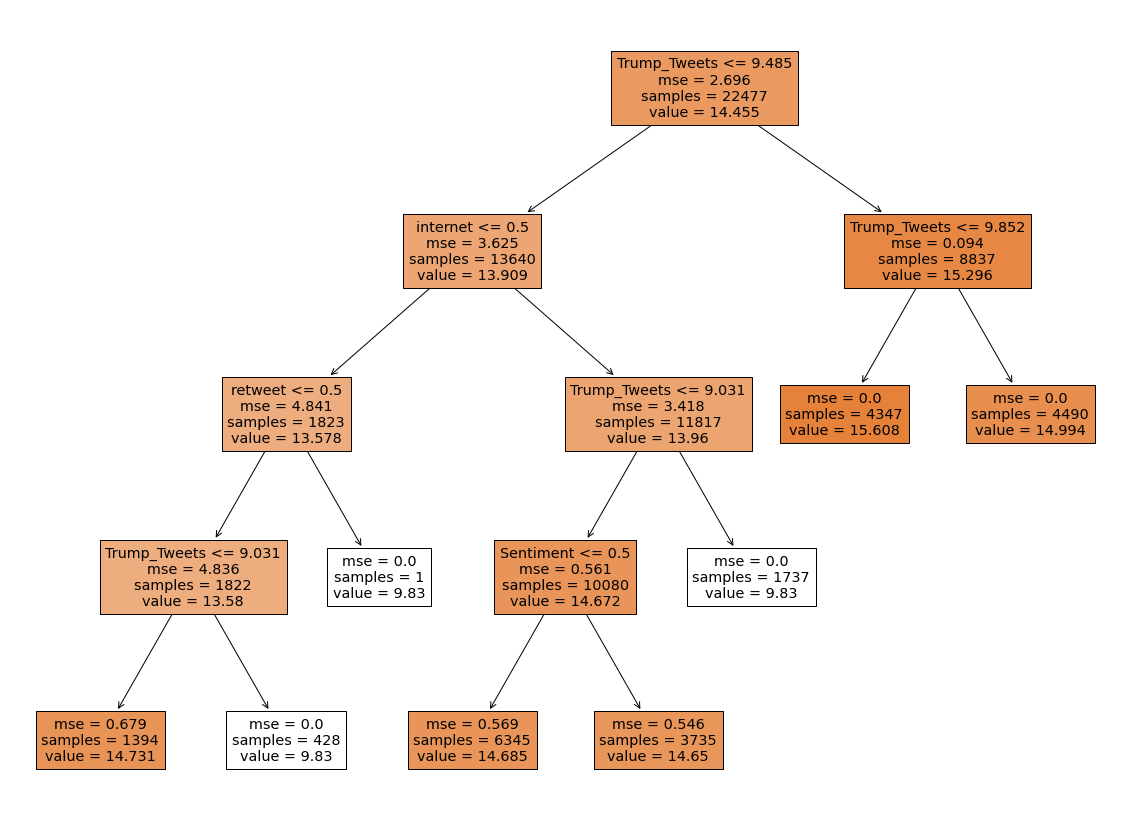

In [ ]:
reg_result = plt.figure(figsize=(20,15))
reg_result = tree.plot_tree(dt, feature_names=df_features.columns, filled=True)

Feature: 0, Score: 0.99541
Feature: 1, Score: 0.00428
Feature: 2, Score: 0.00026
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00000


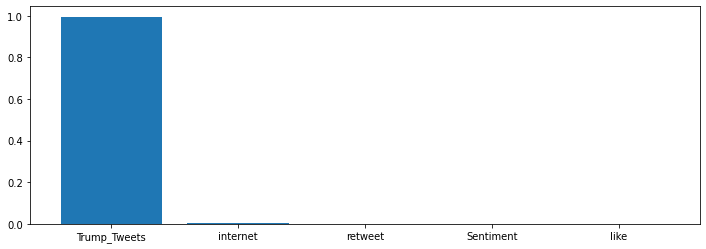

In [ ]:
# get top 5 important features
importance = elec.feature_importances_
ind = np.argsort(-importance)[:5]

# summarize feature importance
for i,v in enumerate(importance[ind]):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(12,4))
plt.bar(df_features.columns[ind], importance[ind])
plt.show()

The results from the regression tree show that the most important features when prediciting election results in order of importance are the number of Tweets, number of likes, internet, retweets, and finally sentiment. Furthermore, the image above shows that the number of tweets explained accounted for over 95% of the feature importance. Further, the tree had a test accuracy of 92% and MSE of 18%. 


The results obtained from the regression tree have not provided any useful information relative to the linear regression model. In addition, the results provided by the regression tree differ from those obtained in the linear model. First, the regression tree conveys the importance of features based on a cumulative score. Thus this makes it difficult to intrepret results without creating thresholds. In comparison, the linear model provides metrics like the coefficient p and t values which are used to convey significance. Additionally, the linear model provides an easily interpreatable associative coeffecient relative to the regression tree. 


**CONCLUSION**

In conclusion, the results from the analysis indeed show that social media is correlated with election outcomes and sentiment from social media is a statistically significant factor correlated with vote share. Further, this project is different from other literature and research because it solely focuses on determining the significance of social media factors, compared to other studies that focus on casual impacts. In addition, several challenges were faced in this project that can be improved in subsequent studies. First, is the inadequate amount of textual processing used to build the sentiment index which did not incorporate negation. Further, the list of stop words was not modified for the purpose of adequately omitting certain words, that did or did not serve as stop words.In addition, Instrumental variable regression can be utilized in other projects to determine causal impacts of social media on vote share. Furthermore, despite having more tweets and won in more states, Donald Trump was not successful in being elected president. This is mainly due to the fact that the majority of Donald Trumps votes and tweets were from inland states which have fewer populations compared to coastal states, and the tweets made contained negative sentiments about Trump.
